LIBRERIAS

In [94]:
!pip install matplotlib
!pip install mahotas
!pip install cv
!pip install scikit-image
!pip install opencv-python
!pip install pandas
!pip install tabulate


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [87]:
import numpy as np
import cv2 as cv2
import io as io
import skimage as ski
import pandas as pd

%matplotlib inline 
import matplotlib.pyplot as plt
import matplotlib.image as mpi
from time import perf_counter

1. GENERACION DE ESCENAS

2. BINARIZACION

In [4]:
def kapur_threshold(image):
    hist, _ = np.histogram(image, bins=range(256), density=True)
    c_hist = hist.cumsum()
    c_hist_i = 1.0 - c_hist

    # To avoid invalid operations regarding 0 and negative values.
    c_hist[c_hist <= 0] = 1
    c_hist_i[c_hist_i <= 0] = 1

    c_entropy = (hist * np.log(hist + (hist <= 0))).cumsum()
    b_entropy = -c_entropy / c_hist + np.log(c_hist)

    c_entropy_i = c_entropy[-1] - c_entropy
    f_entropy = -c_entropy_i / c_hist_i + np.log(c_hist_i)

    return np.argmax(b_entropy + f_entropy)


METODOS GLOBALES

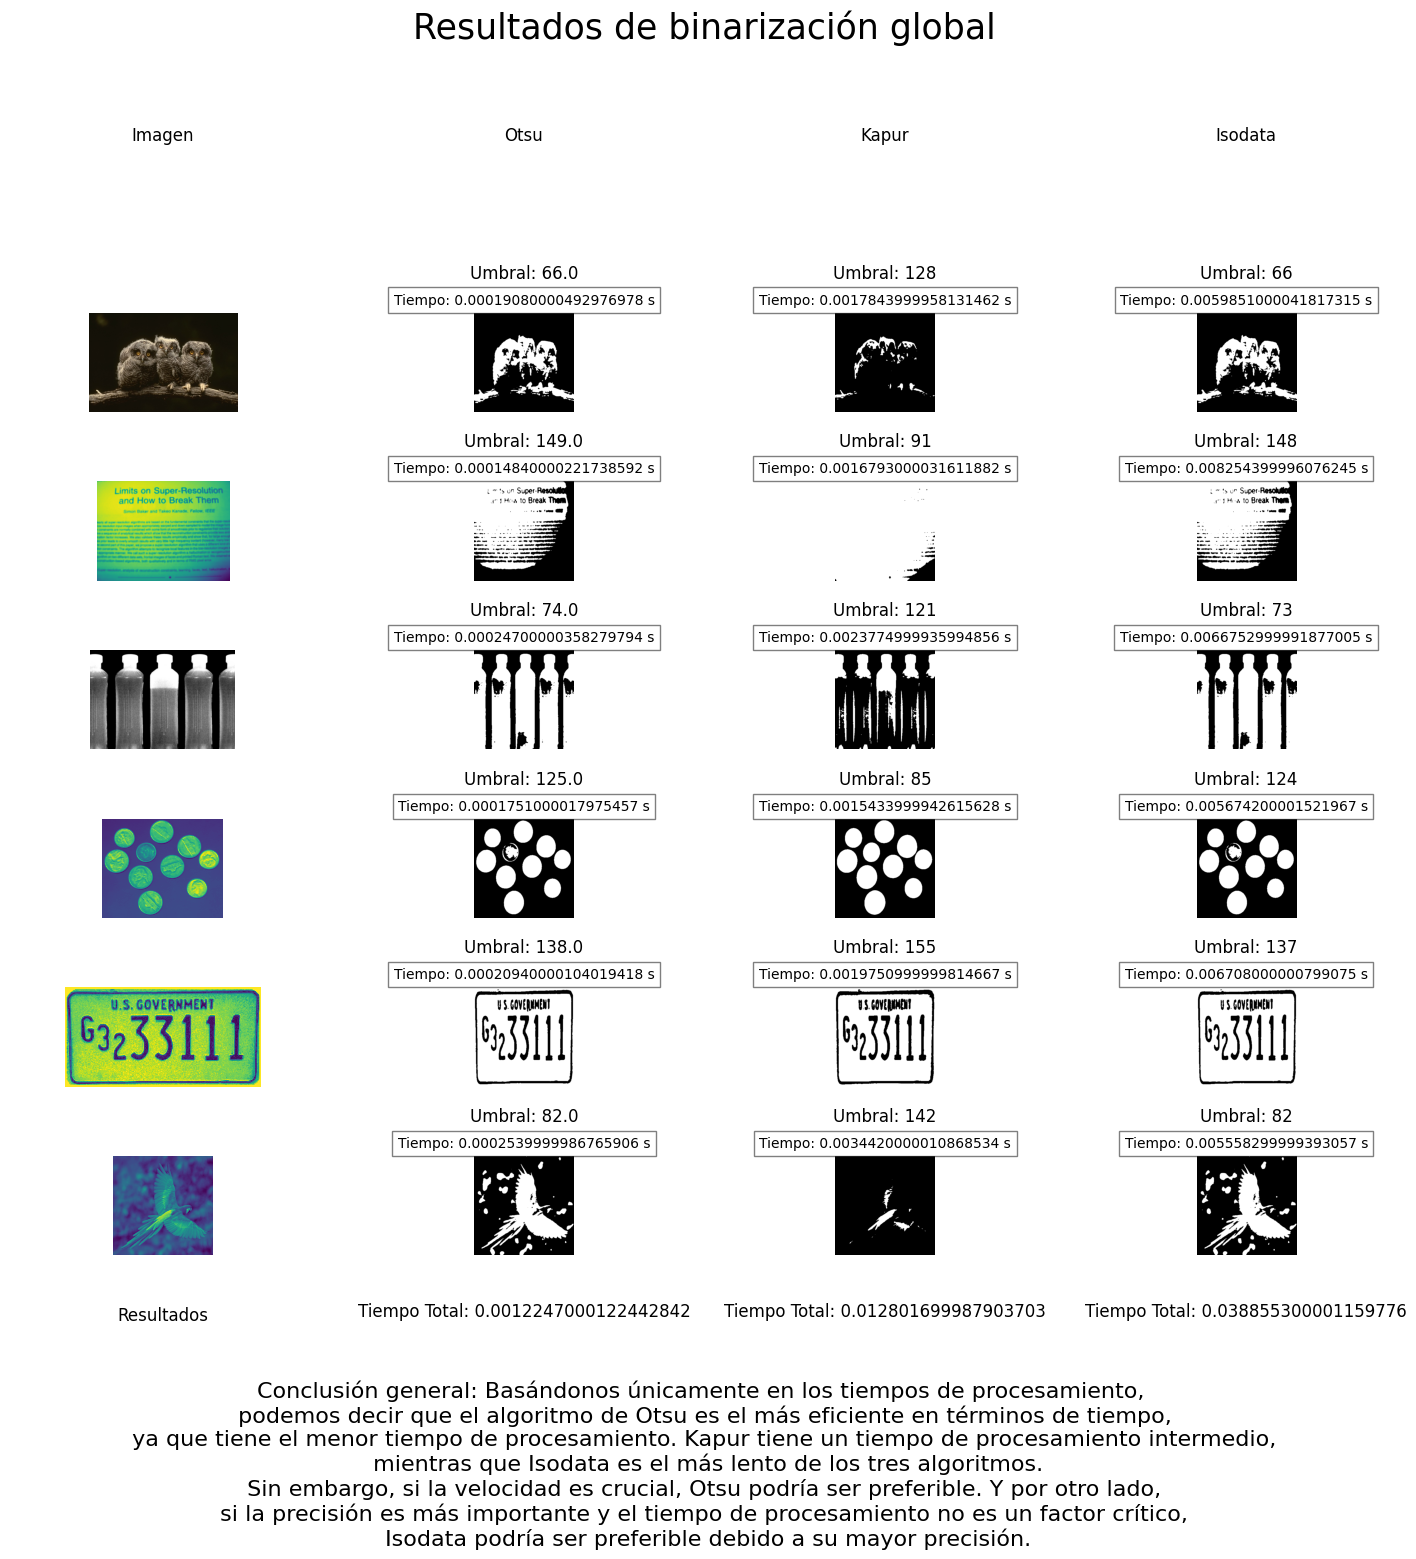

In [81]:
PATH="../A/"

# Metodos globales
imagesLocation=[ PATH+"42044.jpg", PATH+"blur.png", PATH+"bottles.png", PATH+"coins.png", PATH+"plate.png", PATH+"parrot.png"]
binarizationResult=[]

tiempos = []

for location in imagesLocation :
    original=cv2.imread(location)

    grayScale=cv2.cvtColor(cv2.resize(original, (400, 400)), cv2.COLOR_BGR2GRAY)
    blurred=cv2.GaussianBlur(grayScale, (7, 7), 0)
    
    # Otsu metodo
    T_otsu, thresh1 = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

    # Isodata metodo
    T_isodata = ski.filters.threshold_isodata(blurred)
    thresh2 = blurred > T_isodata

    # Kapur metodo
    T_kapur = kapur_threshold(blurred)
    thresh3 = blurred > T_kapur
    
    binarizationResult.append([(thresh1, T_otsu), (thresh3, T_kapur), (thresh2, T_isodata)])

index=1
counter=0
row=len(imagesLocation)+2
plt.figure(figsize=(15,15))
plt.suptitle("Resultados de binarización global", fontsize=25) 

# Cabecera
plt.subplot(row, 4,1)
plt.title("Imagen", ha='center', va='top')    
plt.axis("off")

plt.subplot(row, 4,2)
plt.title("Otsu", ha='center', va='top')
plt.axis("off")

plt.subplot(row, 4,3)
plt.title("Kapur", ha='center', va='top')
plt.axis("off")

plt.subplot(row, 4,4)
plt.title("Isodata", ha='center', va='top')
plt.axis("off")


for result in binarizationResult:

    # Imagen a procesar:   

    plt.subplot(row, 4, (4 * index) + 1)
    imagen=mpi.imread(imagesLocation[index-1])
    plt.imshow(imagen)
    plt.axis("off")

    # Primera columna
    plt.subplot(row, 4, (4 * index) + 2)
    plt.title(f"Umbral: {result[0][1]}", pad=25)
    plt.imshow(result[0][0], cmap=plt.cm.gray)
    plt.axis("off")
    img_height, img_width = result[0][0].shape
    plt.text(img_width / 2, -img_height * 0.2, f"Tiempo: {tiempos[counter]} s", ha='center', va='top', bbox=dict(facecolor='white', alpha=0.5)) 
    counter += 1

    # Segunda columna
    plt.subplot(row, 4, (4 * index) + 2 + 1)
    plt.title(f"Umbral: {result[1][1]}", pad=25) 
    plt.imshow(np.uint8(result[1][0]), cmap=plt.cm.gray)
    plt.axis("off")
    img_height, img_width = result[1][0].shape
    plt.text(img_width / 2, -img_height * 0.2, f"Tiempo: {tiempos[counter]} s", ha='center', va='top', bbox=dict(facecolor='white', alpha=0.5)) 
    counter += 1

    # Tercera columna
    plt.subplot(row, 4, (4 * index) + 2 + 2)
    plt.title(f"Umbral: {result[2][1]}", pad=25) 
    plt.imshow(np.uint8(result[2][0]), cmap=plt.cm.gray)
    plt.axis("off")
    img_height, img_width = result[2][0].shape
    plt.text(img_width / 2, -img_height * 0.2, f"Tiempo: {tiempos[counter]} s", ha='center', va='top', bbox=dict(facecolor='white', alpha=0.5)) 
    counter += 1

    index+=1

    plt.tight_layout(pad=4.0, h_pad=1.5)

# Muestra de resultados

plt.subplot(row, 4, 29)
plt.title("Resultados", ha='center', va='top')
plt.axis("off")


for i in range(0,3):
    sumaTiempos = tiempos[i]+tiempos[i+3]+tiempos[i+6]+tiempos[i+9]+tiempos[i+12]+tiempos[i+15]
    plt.subplot(row, 4, 30+i)
    plt.title(f"Tiempo Total: {sumaTiempos} s")
    plt.axis("off")

plt.figtext(0.5, 0.01, "Conclusión general: Basándonos únicamente en los tiempos de procesamiento, " + 
            "\n podemos decir que el algoritmo de Otsu es el más eficiente en términos de tiempo, " + 
            "\n ya que tiene el menor tiempo de procesamiento. Kapur tiene un tiempo de procesamiento intermedio, "+
            "\n mientras que Isodata es el más lento de los tres algoritmos."+ 
            "\n Sin embargo, si la velocidad es crucial, Otsu podría ser preferible. Y por otro lado, "+ 
            "\n si la precisión es más importante y el tiempo de procesamiento no es un factor crítico, "+
            "\n Isodata podría ser preferible debido a su mayor precisión."
            , ha='center', va='center', fontsize=16)  


plt.show()


METODOS LOCALES

In [113]:
# Creación de tabla

tabla = np.array([["Imagen", " ", "Niblack","","","Sauvula","","","Bernsen",""],
                 ["", "100x100","300x300","800x800","100x100","300x300","800x800","100x100","300x300","800x800"],
                 ["Imagen 1","","","","","","","","",""],
                 ["Imagen 2","","","","","","","","",""],
                 ["Imagen 3","","","","","","","","",""],
                 ["Imagen 4","","","","","","","","",""],
                 ["Imagen 5","","","","","","","","",""],
                 ["Imagen 6","","","","","","","","",""],
                 ["Tiempo total","","","","","","","","",""],])

tabla[2][1] = 120
tabla[2][2] = 240
tabla[2][3] = 360

tabla = tabla.tolist()
print(tabulate(tabla))

------------  -------  -------  -------  -------  -------  -------  -------  -------  -------
Imagen                 Niblack                    Sauvula                    Bernsen
              100x100  300x300  800x800  100x100  300x300  800x800  100x100  300x300  800x800
Imagen 1      120      240      360
Imagen 2
Imagen 3
Imagen 4
Imagen 5
Imagen 6
Tiempo total
------------  -------  -------  -------  -------  -------  -------  -------  -------  -------


Método Niblack

------------  ---------------------  --------------------  -------------------  -------  -------  -------  -------  -------  -------
Imagen                               Niblack                                             Sauvula                    Bernsen
              100x100                300x300               800x800              100x100  300x300  800x800  100x100  300x300  800x800
Imagen 1      0.0028414999978849664  0.015079699995112605  0.11100920000171755
Imagen 2      0.0022957000037422404  0.009412799990968779  0.10356709999905434
Imagen 3      0.0020440999942366034  0.008004899995285086  0.15892400000302587
Imagen 4      0.0036210999969625846  0.014954800004488789  0.1496439000038663
Imagen 5      0.003050800005439669   0.017781800008378923  0.13248729999759234
Imagen 6      0.0017552000063005835  0.009741400004713796  0.10088509999332018
Tiempo total  0.015608400004566647   0.07497539999894798   0.7565165999985766
------------  ---------------------  --------------------  

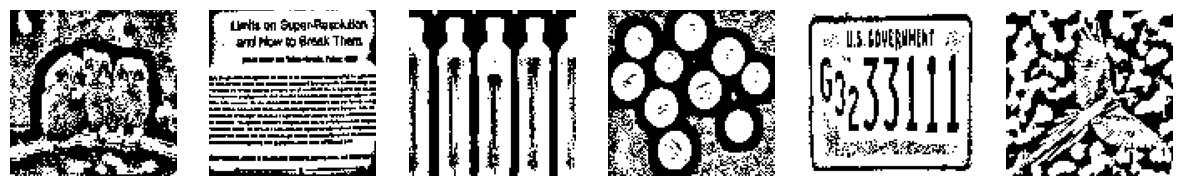

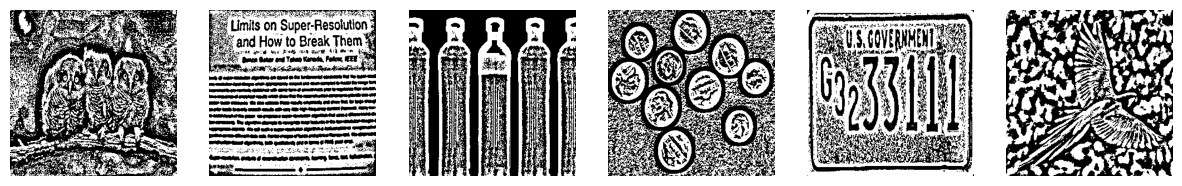

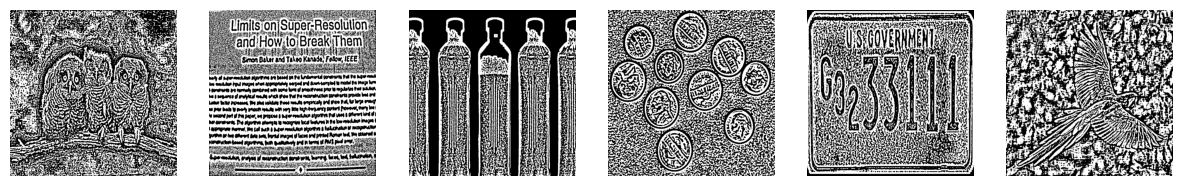

In [125]:
# Metodos locales
images=[]
indexImage = 2
for location in imagesLocation :
    original=cv2.imread(location)
    size1 = cv2.resize(original, (100, 100))
    size2 = cv2.resize(original, (300, 300))
    size3 = cv2.resize(original, (800, 800))
    
    grayScale1=cv2.cvtColor(size1, cv2.COLOR_BGR2GRAY)
    grayScale2=cv2.cvtColor(size2, cv2.COLOR_BGR2GRAY)
    grayScale3=cv2.cvtColor(size3, cv2.COLOR_BGR2GRAY)

    tiempoInicio = perf_counter()
    thresh1 = ski.filters.threshold_niblack(grayScale1)
    thresh_img1 = (grayScale1 > thresh1)*1
    tiempoFin = perf_counter()
    tabla[indexImage][1] = tiempoFin - tiempoInicio

    tiempoInicio = perf_counter()
    thresh2 = ski.filters.threshold_niblack(grayScale2,k=0)
    thresh_img2 = (grayScale2 > thresh2)*1
    tiempoFin = perf_counter()
    tabla[indexImage][2] = tiempoFin - tiempoInicio

    tiempoInicio = perf_counter()
    thresh3 = ski.filters.threshold_niblack(grayScale3,k=0)
    thresh_img3 = (grayScale3 > thresh3)*1
    tiempoFin = perf_counter()
    tabla[indexImage][3] = tiempoFin - tiempoInicio

    images.append([(thresh_img1, thresh1), (thresh_img2, thresh2), (thresh_img3, thresh3)])

    indexImage += 1

tabla [8][1] = sum(tabla[i][1] for i in range(2, 8)) 
tabla [8][2] = sum(tabla[i][2] for i in range(2, 8)) 
tabla [8][3] = sum(tabla[i][3] for i in range(2, 8)) 

print(tabulate(tabla))

n=len(images)
plt.figure(figsize=(15,15))
for ind in range(0, n):
    plt.subplot(1, n, ind+1)
    plt.imshow(np.uint8(images[ind][0][0]), cmap=plt.cm.gray) 
    plt.axis("off")

plt.figure(figsize=(15,15))
for ind in range(0, n):
    plt.subplot(1, n, ind+1)
    plt.imshow(np.uint8(images[ind][1][0]), cmap=plt.cm.gray) 
    plt.axis("off")

plt.figure(figsize=(15,15))
for ind in range(0, n):
    plt.subplot(1, n, ind+1)
    plt.imshow(np.uint8(images[ind][2][0]), cmap=plt.cm.gray) 
    plt.axis("off")


Método Sauvola

------------  ---------------------  --------------------  -------------------  ---------------------  --------------------  -------------------  -------  -------  -------
Imagen                               Niblack                                                           Sauvula                                             Bernsen
              100x100                300x300               800x800              100x100                300x300               800x800              100x100  300x300  800x800
Imagen 1      0.0028414999978849664  0.015079699995112605  0.11100920000171755  0.0058351999905426055  0.017537000006996095  0.13774579999153502
Imagen 2      0.0022957000037422404  0.009412799990968779  0.10356709999905434  0.0024384999996982515  0.01169810000283178   0.15177560001029633
Imagen 3      0.0020440999942366034  0.008004899995285086  0.15892400000302587  0.0019207000004826114  0.00828449999971781   0.11605350000900216
Imagen 4      0.0036210999969625846  0.014954800004488789 

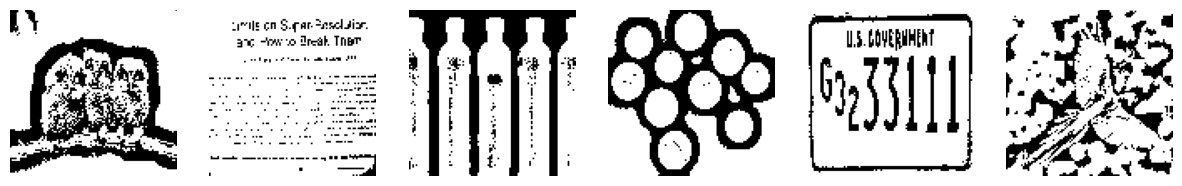

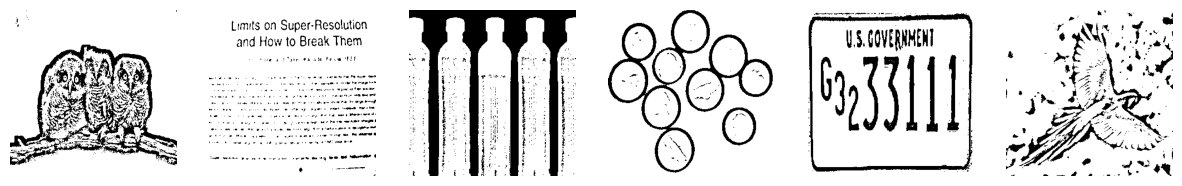

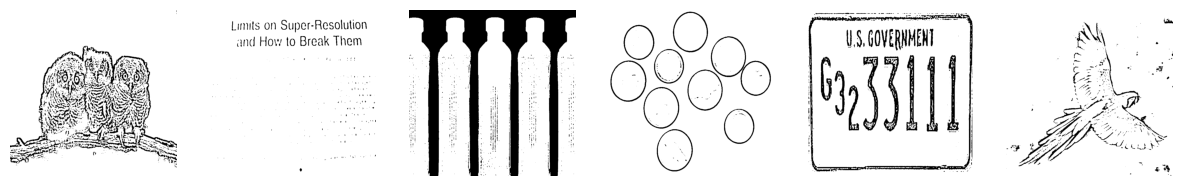

In [127]:
images=[]
indexImage = 2

for location in imagesLocation :
    original=cv2.imread(location)
    size1 = cv2.resize(original, (100, 100))
    size2 = cv2.resize(original, (300, 300))
    size3 = cv2.resize(original, (800, 800))
    
    grayScale1=cv2.cvtColor(size1, cv2.COLOR_BGR2GRAY)
    grayScale2=cv2.cvtColor(size2, cv2.COLOR_BGR2GRAY)
    grayScale3=cv2.cvtColor(size3, cv2.COLOR_BGR2GRAY)
    
    tiempoInicio = perf_counter()
    thresh1 = ski.filters.threshold_sauvola(grayScale1)
    thresh_img1 = (grayScale1 > thresh1)*1
    tiempoFin = perf_counter()
    tabla[indexImage][4] = tiempoFin - tiempoInicio

    tiempoInicio = perf_counter()
    thresh2 = ski.filters.threshold_sauvola(grayScale2)
    thresh_img2 = (grayScale2 > thresh2)*1
    tiempoFin = perf_counter()
    tabla[indexImage][5] = tiempoFin - tiempoInicio

    tiempoInicio = perf_counter()
    thresh3 = ski.filters.threshold_sauvola(grayScale3)
    thresh_img3 = (grayScale3 > thresh3)*1
    tiempoFin = perf_counter()
    tabla[indexImage][6] = tiempoFin - tiempoInicio

    #print(thresh1)
    #print(thresh2)
    #print(thresh3)

    indexImage += 1
    images.append([(thresh_img1, thresh1), (thresh_img2, thresh2), (thresh_img3, thresh3)])

tabla [8][4] = sum(tabla[i][4] for i in range(2, 8)) 
tabla [8][5] = sum(tabla[i][5] for i in range(2, 8)) 
tabla [8][6] = sum(tabla[i][6] for i in range(2, 8)) 

print(tabulate(tabla))


n=len(images)
plt.figure(figsize=(15,15))
for ind in range(0, n):
    plt.subplot(1, n, ind+1)
    plt.imshow(np.uint8(images[ind][0][0]), cmap=plt.cm.gray) 
    plt.axis("off")

plt.figure(figsize=(15,15))
for ind in range(0, n):
    plt.subplot(1, n, ind+1)
    plt.imshow(np.uint8(images[ind][1][0]), cmap=plt.cm.gray) 
    plt.axis("off")

plt.figure(figsize=(15,15))
for ind in range(0, n):
    plt.subplot(1, n, ind+1)
    plt.imshow(np.uint8(images[ind][2][0]), cmap=plt.cm.gray) 
    plt.axis("off")

Método Bernsen

In [129]:

from skimage import io, color, filters
import numpy as np

# Cargar una imagen en escala de grises
image = io.imread(imagesLocation[1], as_gray=True)

# Aplicar la binarización local de Bernsen
block_size = 51  # Tamaño del bloque para la binarización local
bernsen_threshold = filters.threshold_local(image, block_size, method='bernsen', mode='reflect')

# Binarizar la imagen utilizando el umbral de Bernsen
binary_image = image >= bernsen_threshold*1

# Mostrar la imagen binarizada
io.imshow(binary_image)
io.show()

ValueError: Invalid method specified. Please use `generic`, `gaussian`, `mean`, or `median`.